In [1]:
# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing train and test dataset

In [4]:
sal_train = pd.read_csv(r"D:\Data science\Assignments docs\Naive Bayes\SalaryData_Train.csv")
sal_test = pd.read_csv(r"D:\Data science\Assignments docs\Naive Bayes\SalaryData_Test.csv")

In [5]:
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
# Intial data exploration

In [8]:
sal_train.shape

(30161, 14)

In [9]:
sal_test.shape

(15060, 14)

In [10]:
sal_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [11]:
sal_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


## Exploratory data analysis

In [13]:
# Checking null values in the dataset

In [14]:
sal_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
sal_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### There are no null values in the datset

In [16]:
# Seperating numerical variables and categorical variables

In [17]:
num_values = [feature for feature in sal_train.columns if sal_train[feature].dtypes != "O" ]
num_values

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [18]:
sal_train[num_values].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


### Univariate analysis

In [19]:
# Plotting histograms for numerical values

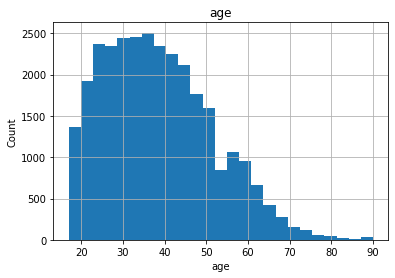

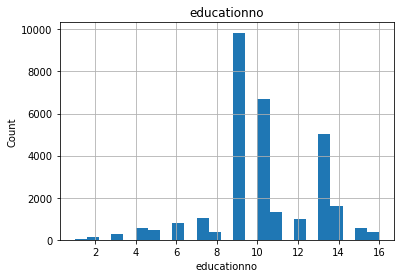

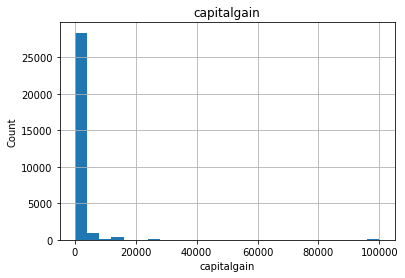

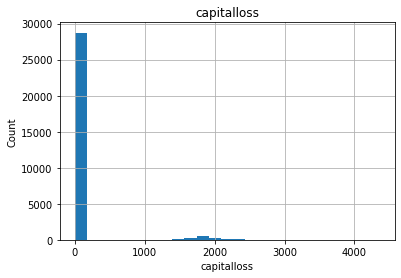

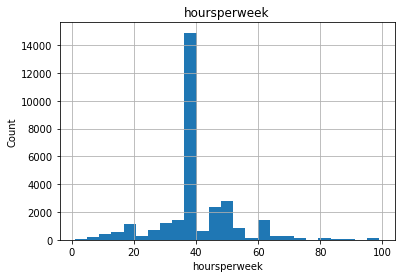

In [20]:
for feature in num_values:
    sal_train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### All the numerical variables are skewed and no variable is normally distributed

### Bivariate analysis

In [21]:
num_values

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

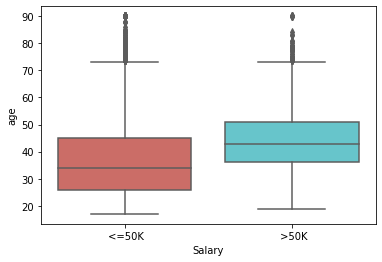

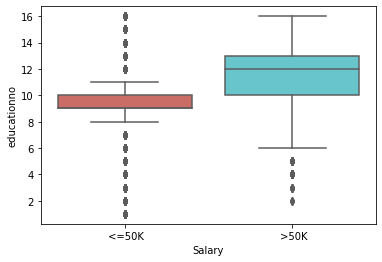

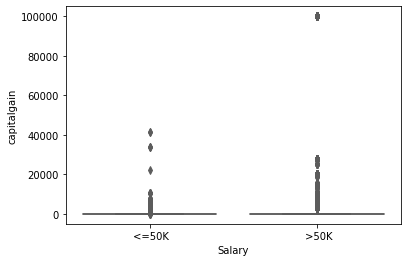

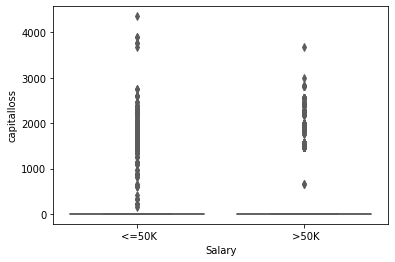

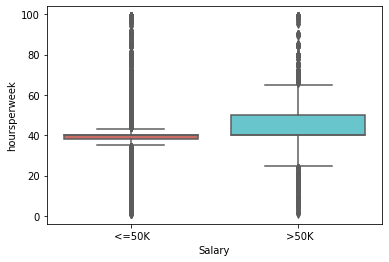

In [22]:
for feature in num_values:
    sns.boxplot("Salary",feature, data=sal_train, palette='hls')
    plt.show()

In [23]:
# Categorical variables

In [24]:
cat_values = [feature for feature in sal_train.columns if sal_train[feature].dtypes == "O"]
cat_values

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [25]:
# Chekcing unique values in each categorical variable

In [26]:
sal_train[cat_values].nunique()

workclass         7
education        16
maritalstatus     7
occupation       14
relationship      6
race              5
sex               2
native           40
Salary            2
dtype: int64

### Univariate analysis

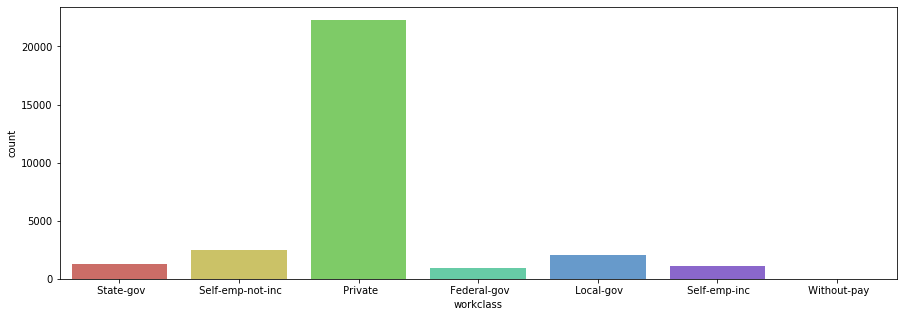

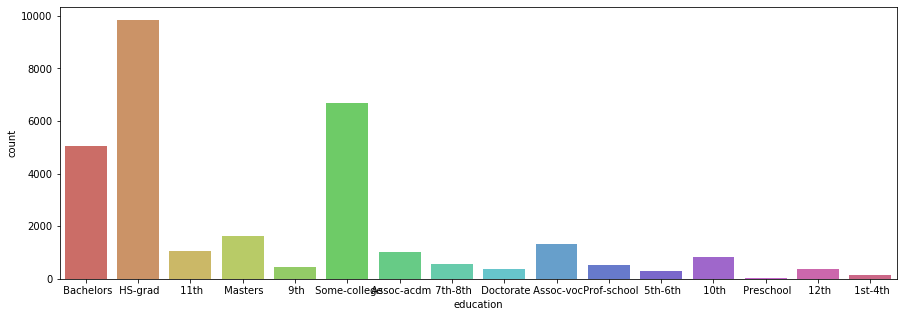

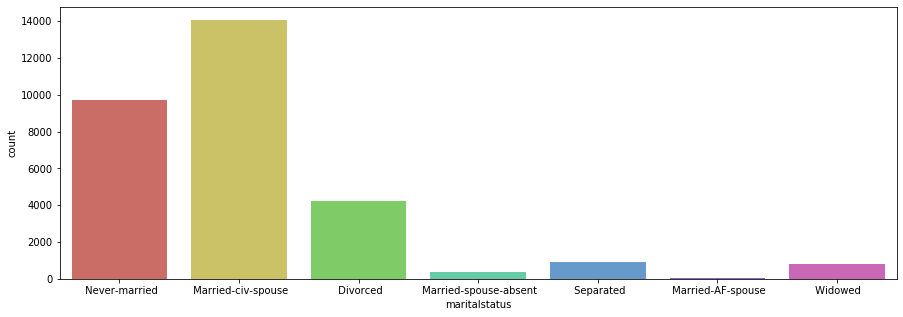

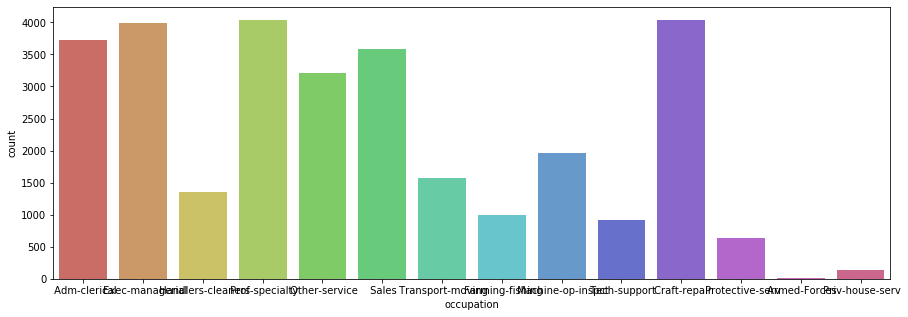

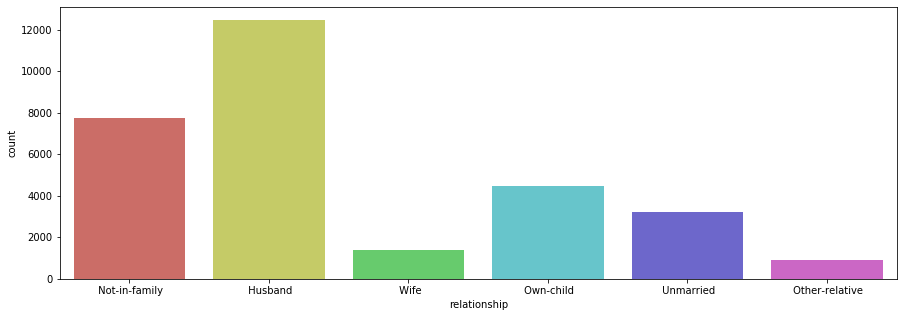

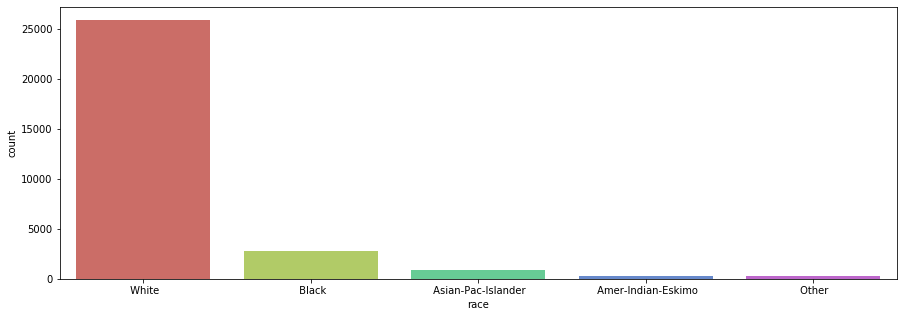

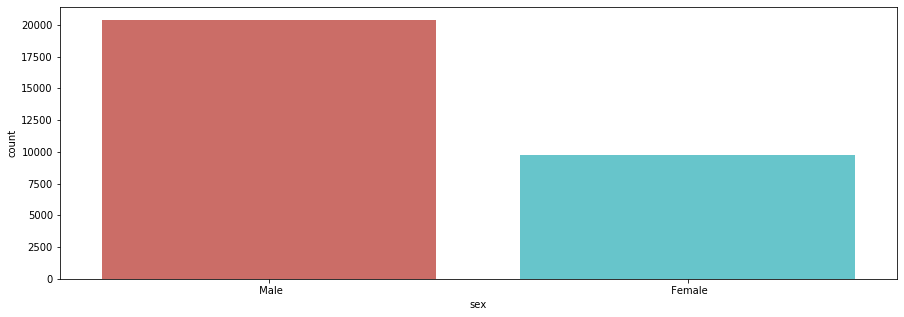

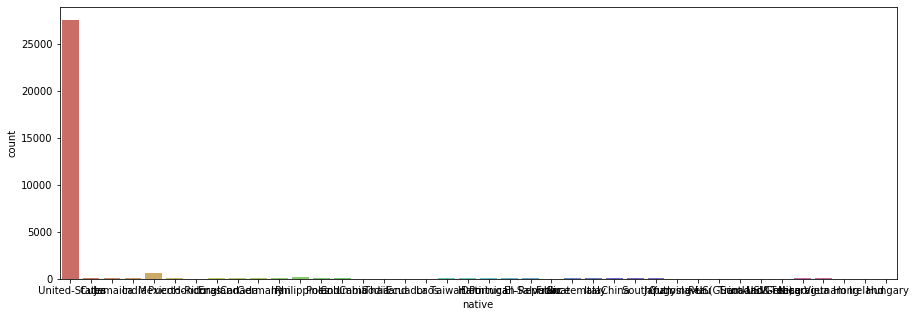

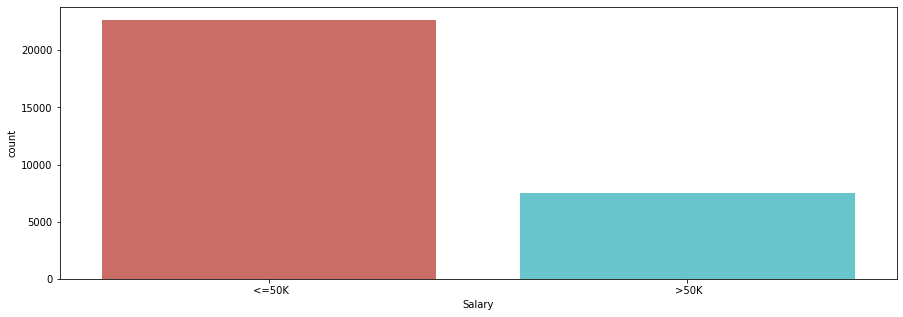

In [27]:
for feature in cat_values:
    plt.figure(figsize=(15,5))
    sns.countplot(feature, data=sal_train , palette='hls')
    plt.show()

### Bivariate analysis

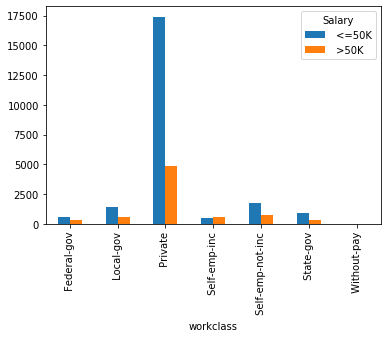

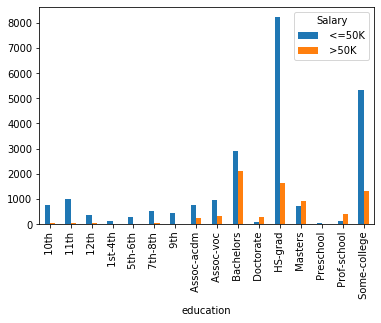

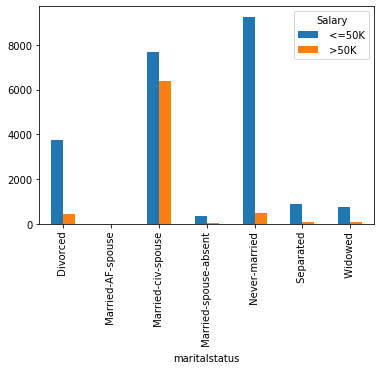

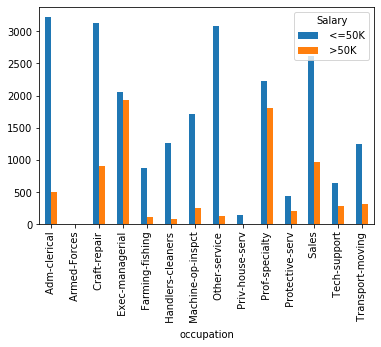

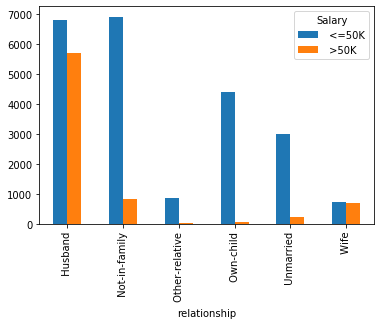

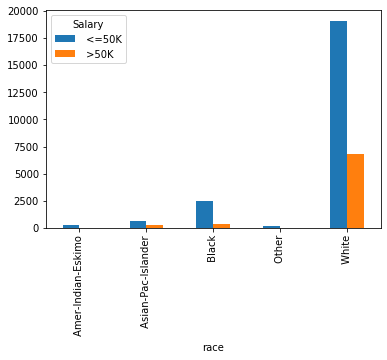

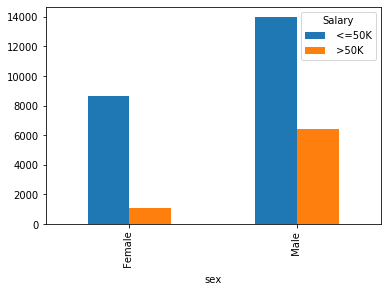

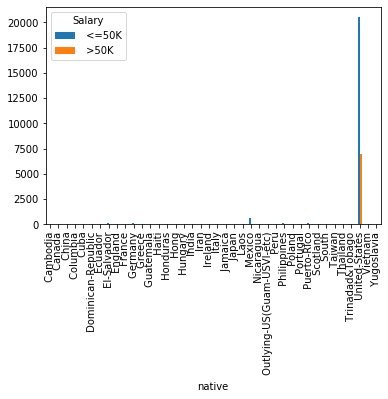

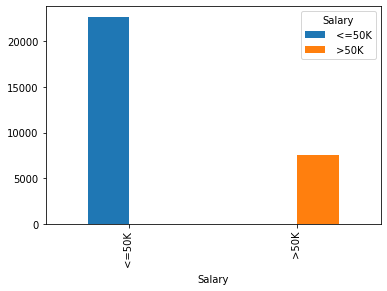

In [28]:
for feature in cat_values:
    pd.crosstab(sal_train[feature], sal_train["Salary"]).plot(kind="bar")
    plt.show()

### Encoding the categorical variables

In [29]:
cat_values

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [30]:
cat_values.remove("Salary")

In [31]:
from sklearn import preprocessing

In [32]:
for i in  cat_values:
    encode = preprocessing.LabelEncoder()
    sal_train[i] = encode.fit_transform(sal_train[i])
    sal_test[i] = encode.fit_transform(sal_test[i])

In [33]:
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


### Correlation matrix

In [34]:
correlation = sal_train.corr()
correlation

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513


In [35]:
# Dropping "education" column as it is similar to "education_no" and also dropping "capital_loss" and "capital_gain" as they are not useful in the analysis

In [36]:
sal_train = sal_train.drop(columns=['education','capitalgain','capitalloss'])
sal_test = sal_test.drop(columns=['education','capitalgain','capitalloss'])

In [37]:
sal_train.shape

(30161, 11)

In [38]:
colnames =sal_train.columns

In [39]:
colnames

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [43]:
# Splitting the data into train and test

In [44]:
x_train = sal_train[colnames[0:10]]
x_test =sal_test[colnames[0:10]]
y_train = sal_train[colnames[10]]
y_test = sal_test[colnames[10]]

## Feature scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
# for training

In [45]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [46]:
x_train = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)

In [47]:
# for test

In [48]:
scaler=MinMaxScaler()
scaler.fit(x_test)

MinMaxScaler()

In [49]:
x_test = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

## Model building

In [50]:
from sklearn.svm import SVC

### Using "linear" kernel

In [51]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [52]:
# Predicting the values

In [53]:
pred_train_linear = model_linear.predict(x_train)       # for train

In [54]:
pred_test_linear = model_linear.predict(x_test)        # for test

In [55]:
# Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
confusion_matrix(y_train, pred_train_linear)          # for train

array([[21249,  1404],
       [ 4483,  3025]], dtype=int64)

In [58]:
confusion_matrix(y_test, pred_test_linear)            # for test

array([[10613,   747],
       [ 2237,  1463]], dtype=int64)

In [59]:
# Checing the accuracy

In [60]:
acc_train_linear = accuracy_score(y_train, pred_train_linear)           # for train
acc_train_linear

0.8048141639866052

In [61]:
acc_train_linear = accuracy_score(y_test, pred_test_linear)             # for test
acc_train_linear

0.801859229747676

### Using "poly" kernel

In [62]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [63]:
# Predicting the values

In [64]:
pred_train_poly = model_poly.predict(x_train)       # for train

In [65]:
pred_test_poly = model_poly.predict(x_test)        # for test

In [66]:
# Confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [68]:
confusion_matrix(y_train, pred_train_poly)          # for train

array([[21346,  1307],
       [ 4007,  3501]], dtype=int64)

In [69]:
confusion_matrix(y_test, pred_test_poly)            # for test

array([[10677,   683],
       [ 2004,  1696]], dtype=int64)

In [70]:
# Checing the accuracy

In [71]:
acc_train_poly = accuracy_score(y_train, pred_train_poly)           # for train
acc_train_poly

0.8238122078180432

In [72]:
acc_train_poly = accuracy_score(y_test, pred_test_poly)             # for test
acc_train_poly

0.8215803452855246

### Using "rbf" kernel

In [73]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [74]:
# Predicting the values

In [75]:
pred_train_rbf = model_rbf.predict(x_train)       # for train

In [76]:
pred_test_rbf = model_rbf.predict(x_test)        # for test

In [77]:
# Confusion matrix

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [79]:
confusion_matrix(y_train, pred_train_rbf)          # for train

array([[21350,  1303],
       [ 4008,  3500]], dtype=int64)

In [80]:
confusion_matrix(y_test, pred_test_rbf)            # for test

array([[10677,   683],
       [ 2009,  1691]], dtype=int64)

In [81]:
# Checing the accuracy

In [82]:
acc_train_rbf = accuracy_score(y_train, pred_train_rbf)           # for train
acc_train_rbf

0.8239116740161135

In [83]:
acc_train_rbf = accuracy_score(y_test, pred_test_rbf)             # for test
acc_train_rbf

0.8212483399734396

#### Among the three kernels, 'poly' kernel is giving highest accuracy, hence parameter tuning of 'poly' kernel

### Tune parameters

###  Regularization (C)

In [84]:
# With C=1

In [85]:
model_poly = SVC(kernel = "poly", C=1)
model_poly.fit(x_train,y_train)

SVC(C=1, kernel='poly')

In [86]:
model_poly.score(x_test, y_test)

0.8215803452855246

In [87]:
# With C = 10

In [90]:
model_poly = SVC(kernel = "poly", C=10)
model_poly.fit(x_train,y_train)

SVC(C=5, kernel='poly')

In [89]:
model_poly.score(x_test, y_test)

0.8209827357237716

In [91]:
# Changing the "gamma" value to "auto"

In [92]:
model_poly = SVC(kernel = "poly", C=1, gamma="auto")
model_poly.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [93]:
model_poly.score(x_test, y_test)

0.8098273572377158

In [94]:
#### There is no improvement in the accuracy of the model with tuning in regularization

In [95]:
#### Hence the best model for the given dataset is SVM model with parameters, 'poly'as kernel and C = 1